# Apple Mobility Data


The Apple Mobility data used for this project is Time Series Data.
Time series data is a collection of data points that are assembled over periods in time and ordered chronologically. The time interval at which the data is collected is often referred to as the time series frequency.

In [1]:
# Dependencies and Setup
import json
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import urllib.request

### Retrieving the link of the Apple Mobility Trends report file via API

In [2]:
with urllib.request.urlopen('https://covid19-static.cdn-apple.com/covid19-mobility-data/current/v3/index.json') as url:
    json_data = json.loads(url.read().decode())
link = 'https://covid19-static.cdn-apple.com' + json_data['basePath'] + json_data['regions']['en-us']['csvPath']
link

'https://covid19-static.cdn-apple.com/covid19-mobility-data/2014HotfixDev12/v3/en-us/applemobilitytrends-2020-08-12.csv'

### Retrieving the Apple Mobility trends report as csv

In [3]:
data_dir = 'Data'

if not os.path.exists(data_dir):
    os.makedirs(data_dir)

path = os.path.join(data_dir, 'applemobilitytrends.csv')
urllib.request.urlretrieve(link, path)

('Data/applemobilitytrends.csv', <http.client.HTTPMessage at 0x7fac33cb46d0>)

In [4]:
df = pd.read_csv(path)
df

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2020-08-03,2020-08-04,2020-08-05,2020-08-06,2020-08-07,2020-08-08,2020-08-09,2020-08-10,2020-08-11,2020-08-12
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,213.40,193.56,201.82,187.74,203.09,218.60,234.00,230.14,215.44,216.40
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,152.20,140.26,152.96,144.52,150.49,151.17,140.72,163.50,166.27,168.27
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,55.03,57.82,58.69,57.83,66.13,63.37,36.89,55.64,57.49,59.57
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,44.05,49.23,47.49,43.61,48.15,48.86,27.78,43.74,45.29,46.27
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,86.67,88.74,87.77,92.37,90.20,73.91,78.69,82.83,85.36,89.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3620,county,York County,driving,NaN,Virginia,United States,100.0,100.96,111.03,111.97,...,175.31,160.14,192.54,186.80,224.21,278.61,204.46,187.39,187.82,180.44
3621,county,York County,driving,NaN,Maine,United States,100.0,103.05,103.98,82.24,...,265.11,227.79,251.82,275.31,315.77,344.68,323.34,274.71,266.75,264.64
3622,county,Young County,driving,NaN,Texas,United States,100.0,98.85,97.76,92.21,...,163.62,166.26,172.56,143.90,230.83,202.37,161.92,161.59,174.66,162.53
3623,county,Yuba County,driving,NaN,California,United States,100.0,102.98,103.10,114.08,...,162.37,161.44,157.96,167.28,190.22,183.21,163.29,165.03,160.60,160.27


### Filter the data so that only the US is in the DataFrame

In [5]:
df_us = df[df['country'] == 'United States']
df_us

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2020-08-03,2020-08-04,2020-08-05,2020-08-06,2020-08-07,2020-08-08,2020-08-09,2020-08-10,2020-08-11,2020-08-12
158,city,Akron,driving,NaN,Ohio,United States,100.0,103.06,107.50,106.14,...,147.48,148.57,157.46,159.12,177.50,168.17,133.00,150.64,154.30,156.01
159,city,Akron,transit,NaN,Ohio,United States,100.0,106.69,103.75,100.22,...,56.54,45.22,55.59,50.66,55.07,49.71,40.74,58.09,61.32,52.43
160,city,Akron,walking,NaN,Ohio,United States,100.0,97.23,79.05,74.77,...,114.89,115.93,129.45,127.06,142.07,129.24,93.44,118.53,122.11,123.79
161,city,Albany,driving,NaN,New York,United States,100.0,102.35,107.35,105.54,...,138.11,121.81,146.10,147.56,154.22,143.79,116.19,135.01,137.04,141.15
162,city,Albany,transit,NaN,New York,United States,100.0,100.14,105.95,107.76,...,88.43,75.20,90.11,86.76,86.99,86.02,75.34,87.09,88.62,85.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3620,county,York County,driving,NaN,Virginia,United States,100.0,100.96,111.03,111.97,...,175.31,160.14,192.54,186.80,224.21,278.61,204.46,187.39,187.82,180.44
3621,county,York County,driving,NaN,Maine,United States,100.0,103.05,103.98,82.24,...,265.11,227.79,251.82,275.31,315.77,344.68,323.34,274.71,266.75,264.64
3622,county,Young County,driving,NaN,Texas,United States,100.0,98.85,97.76,92.21,...,163.62,166.26,172.56,143.90,230.83,202.37,161.92,161.59,174.66,162.53
3623,county,Yuba County,driving,NaN,California,United States,100.0,102.98,103.10,114.08,...,162.37,161.44,157.96,167.28,190.22,183.21,163.29,165.03,160.60,160.27


In [6]:
# Remove unneccesary columns
clean_usa_apple_df = df_us.drop(['geo_type','alternative_name','country'], axis = 1)
clean_usa_apple_df.head()

,region,transportation_type,sub-region,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,...,2020-08-03,2020-08-04,2020-08-05,2020-08-06,2020-08-07,2020-08-08,2020-08-09,2020-08-10,2020-08-11,2020-08-12
158,Akron,driving,Ohio,100.0,103.06,107.50,106.14,123.62,105.99,82.68,...,147.48,148.57,157.46,159.12,177.50,168.17,133.00,150.64,154.30,156.01
159,Akron,transit,Ohio,100.0,106.69,103.75,100.22,89.04,74.85,56.99,...,56.54,45.22,55.59,50.66,55.07,49.71,40.74,58.09,61.32,52.43
160,Akron,walking,Ohio,100.0,97.23,79.05,74.77,89.55,88.39,49.30,...,114.89,115.93,129.45,127.06,142.07,129.24,93.44,118.53,122.11,123.79
161,Albany,driving,New York,100.0,102.35,107.35,105.54,128.97,88.28,82.76,...,138.11,121.81,146.10,147.56,154.22,143.79,116.19,135.01,137.04,141.15
162,Albany,transit,New York,100.0,100.14,105.95,107.76,101.39,85.79,82.86,...,88.43,75.20,90.11,86.76,86.99,86.02,75.34,87.09,88.62,85.51


In [7]:
# It is also possible to group a DataFrame by multiple columns
# However this returns an object with multiple indexes,which can be harder to deal with
grouped_df = clean_usa_apple_df.groupby(['sub-region','transportation_type'])
grouped_df

In [8]:
new_grouped_df = pd.DataFrame(grouped_df.mean())
new_grouped_df.head()

2020-01-13  2020-01-14  2020-01-15  \
sub-region transportation_type                                       
Alabama    driving                   100.0  106.228929  103.904286   
           transit                   100.0  105.690000  102.700000   
           walking                   100.0   94.690000   98.190000   
Alaska     driving                   100.0  102.791667  101.543333   
           walking                   100.0   98.800000   98.830000   

                                2020-01-16  2020-01-17  2020-01-18  \
sub-region transportation_type                                       
Alabama    driving               112.42625  146.912321  124.912857   
           transit               104.55000  114.790000  136.980000   
           walking               102.98000  122.600000  124.460000   
Alaska     driving               107.29500  129.666667  129.235000   
           walking               104.05000  117.890000  103.230000   

                                2020-01-19  2020-01-20  2020-01-21  \
sub-region transportation_type                                       
Alabama    driving               99.951607  118.806071  103.450714   
           transit               92.890000  115.080000  102.130000   
           walking               80.390000   86.440000   90.750000   
Alaska     driving               94.898333   99.936667  105.630000   
           walking               80.290000   83.590000  104.400000   

                                2020-01-22  ...  2020-08-03  2020-08-04  \
sub-region transportation_type              ...                           
Alabama    driving              102.401607  ...  171.107679  166.646786   
           transit              114.790000  ...  100.570000  103.410000   
           walking               93.730000  ...  141.960000  148.450000   
Alaska     driving              104.468333  ...  215.691667  220.106667   
           walking               99.900000  ...  191.240000  196.430000   

                                2020-08-05  2020-08-06  2020-08-07  \
sub-region transportation_type                                       
Alabama    driving              170.065893  184.965357  217.460357   
           transit               99.430000   98.860000  103.980000   
           walking              142.610000  147.440000  162.870000   
Alaska     driving              231.445000  225.215000  260.308333   
           walking              198.250000  189.150000  209.620000   

                                2020-08-08  2020-08-09  2020-08-10  \
sub-region transportation_type                                       
Alabama    driving              236.580357  176.660536  170.393393   
           transit               96.870000   87.340000   90.610000   
           walking              168.920000  118.110000  133.310000   
Alaska     driving              264.236667  208.835000  222.775000   
           walking              182.970000  150.170000  178.430000   

                                2020-08-11  2020-08-12  
sub-region transportation_type                          
Alabama    driving              165.493571  167.774286  
           transit               97.300000  109.390000  
           walking              139.890000  148.060000  
Alaska     driving              221.498333  218.900000  
           walking              185.440000  197.840000  

[5 rows x 213 columns]

In [9]:
# Re-order the rows and columns to display USA states in columns
mobility_usa_df = new_grouped_df.stack(level=0).unstack(level=0)
mobility_usa_df.head()

sub-region                         Alabama      Alaska     Arizona  \
transportation_type                                                  
driving             2020-01-13  100.000000  100.000000  100.000000   
                    2020-01-14  106.228929  102.791667  102.441250   
                    2020-01-15  103.904286  101.543333  106.017500   
                    2020-01-16  112.426250  107.295000  112.265000   
                    2020-01-17  146.912321  129.666667  144.551875   

sub-region                        Arkansas  California    Colorado  \
transportation_type                                                  
driving             2020-01-13  100.000000  100.000000  100.000000   
                    2020-01-14  102.640638  100.790135   98.822564   
                    2020-01-15   99.376809  104.586351  101.607179   
                    2020-01-16  107.291915  106.606081  110.052821   
                    2020-01-17  131.684468  132.547297  149.267436   

sub-region                      Connecticut    Delaware     Florida  \
transportation_type                                                   
driving             2020-01-13   100.000000  100.000000  100.000000   
                    2020-01-14   105.730909   97.843333  101.525075   
                    2020-01-15   108.341818  101.126667  103.646716   
                    2020-01-16   109.506364  103.093333  110.552388   
                    2020-01-17   129.346364  120.203333  135.158806   

sub-region                         Georgia  ...   Tennessee       Texas  \
transportation_type                         ...                           
driving             2020-01-13  100.000000  ...  100.000000  100.000000   
                    2020-01-14  102.542130  ...  102.190685  101.345864   
                    2020-01-15  103.869722  ...  100.962055  101.260366   
                    2020-01-16  112.284167  ...  109.449315  105.695707   
                    2020-01-17  140.879815  ...  133.958630  131.525864   

sub-region                            Utah     Vermont  Virgin Islands  \
transportation_type                                                      
driving             2020-01-13  100.000000  100.000000         100.000   
                    2020-01-14  103.360000   99.104167          93.835   
                    2020-01-15  111.986667  101.807500         100.645   
                    2020-01-16  125.180556   97.574167          99.760   
                    2020-01-17  162.067222  157.501667         106.395   

sub-region                        Virginia  Washington  West Virginia  \
transportation_type                                                     
driving             2020-01-13  100.000000  100.000000     100.000000   
                    2020-01-14  100.426771   95.820323     101.714231   
                    2020-01-15  105.134583   97.582581     103.795000   
                    2020-01-16  109.008437  107.143871     106.706154   
                    2020-01-17  133.209792  139.164516     127.506538   

sub-region                       Wisconsin     Wyoming  
transportation_type                                     
driving             2020-01-13  100.000000  100.000000  
                    2020-01-14  102.640566  108.399167  
                    2020-01-15   98.128302  107.194167  
                    2020-01-16  109.983208  109.060833  
                    2020-01-17  125.636415  133.878333  

[5 rows x 53 columns]

In [10]:
clean_usa_mobility_df = mobility_usa_df.reset_index()
clean_usa_mobility_df.head()

sub-region,transportation_type,level_1,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,driving,2020-01-13,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000,100.000000,100.000000,100.000000,100.000000,100.000000
1,driving,2020-01-14,106.228929,102.791667,102.441250,102.640638,100.790135,98.822564,105.730909,97.843333,...,102.190685,101.345864,103.360000,99.104167,93.835,100.426771,95.820323,101.714231,102.640566,108.399167
2,driving,2020-01-15,103.904286,101.543333,106.017500,99.376809,104.586351,101.607179,108.341818,101.126667,...,100.962055,101.260366,111.986667,101.807500,100.645,105.134583,97.582581,103.795000,98.128302,107.194167
3,driving,2020-01-16,112.426250,107.295000,112.265000,107.291915,106.606081,110.052821,109.506364,103.093333,...,109.449315,105.695707,125.180556,97.574167,99.760,109.008437,107.143871,106.706154,109.983208,109.060833
4,driving,2020-01-17,146.912321,129.666667,144.551875,131.684468,132.547297,149.267436,129.346364,120.203333,...,133.958630,131.525864,162.067222,157.501667,106.395,133.209792,139.164516,127.506538,125.636415,133.878333


In [11]:
# Using .rename(columns={}) in order to rename columns
usa_mobility_df = clean_usa_mobility_df.rename(columns={'level_1':"dates"})
usa_mobility_df.head()

sub-region,transportation_type,dates,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,driving,2020-01-13,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000,100.000000,100.000000,100.000000,100.000000,100.000000
1,driving,2020-01-14,106.228929,102.791667,102.441250,102.640638,100.790135,98.822564,105.730909,97.843333,...,102.190685,101.345864,103.360000,99.104167,93.835,100.426771,95.820323,101.714231,102.640566,108.399167
2,driving,2020-01-15,103.904286,101.543333,106.017500,99.376809,104.586351,101.607179,108.341818,101.126667,...,100.962055,101.260366,111.986667,101.807500,100.645,105.134583,97.582581,103.795000,98.128302,107.194167
3,driving,2020-01-16,112.426250,107.295000,112.265000,107.291915,106.606081,110.052821,109.506364,103.093333,...,109.449315,105.695707,125.180556,97.574167,99.760,109.008437,107.143871,106.706154,109.983208,109.060833
4,driving,2020-01-17,146.912321,129.666667,144.551875,131.684468,132.547297,149.267436,129.346364,120.203333,...,133.958630,131.525864,162.067222,157.501667,106.395,133.209792,139.164516,127.506538,125.636415,133.878333


In [12]:
# Export the USA mobility into a csv
usa_mobility_df.to_csv("apple_data/usa_mobility_df.csv")

In [13]:
### The exported dataframe displays only the mean values ###

In [14]:
# Split the data for driving/walking/transit for USA
driving = usa_mobility_df.loc[usa_mobility_df["transportation_type"]=='driving']
driving.head()

sub-region,transportation_type,dates,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,driving,2020-01-13,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000,100.000000,100.000000,100.000000,100.000000,100.000000
1,driving,2020-01-14,106.228929,102.791667,102.441250,102.640638,100.790135,98.822564,105.730909,97.843333,...,102.190685,101.345864,103.360000,99.104167,93.835,100.426771,95.820323,101.714231,102.640566,108.399167
2,driving,2020-01-15,103.904286,101.543333,106.017500,99.376809,104.586351,101.607179,108.341818,101.126667,...,100.962055,101.260366,111.986667,101.807500,100.645,105.134583,97.582581,103.795000,98.128302,107.194167
3,driving,2020-01-16,112.426250,107.295000,112.265000,107.291915,106.606081,110.052821,109.506364,103.093333,...,109.449315,105.695707,125.180556,97.574167,99.760,109.008437,107.143871,106.706154,109.983208,109.060833
4,driving,2020-01-17,146.912321,129.666667,144.551875,131.684468,132.547297,149.267436,129.346364,120.203333,...,133.958630,131.525864,162.067222,157.501667,106.395,133.209792,139.164516,127.506538,125.636415,133.878333


In [15]:
# Split the data for driving/walking/transit for USA
walking = usa_mobility_df.loc[usa_mobility_df["transportation_type"]=='walking']
walking.head()

sub-region,transportation_type,dates,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
422,walking,2020-01-13,100.00,100.00,100.000,NaN,100.000000,100.000,100.000000,NaN,...,100.000,100.000000,100.00,NaN,NaN,100.000000,100.000000,NaN,100.000,NaN
423,walking,2020-01-14,94.69,98.80,111.570,NaN,102.373810,107.505,106.323333,NaN,...,99.400,103.376667,109.15,NaN,NaN,95.596667,102.786667,NaN,124.115,NaN
424,walking,2020-01-15,98.19,98.83,151.610,NaN,104.780000,107.815,110.183333,NaN,...,94.020,106.098333,119.97,NaN,NaN,97.976667,109.006667,NaN,110.765,NaN
425,walking,2020-01-16,102.98,104.05,141.560,NaN,98.784762,109.575,105.916667,NaN,...,102.195,105.256667,132.89,NaN,NaN,100.333333,116.906667,NaN,110.405,NaN
426,walking,2020-01-17,122.60,117.89,146.155,NaN,128.080952,137.665,123.240000,NaN,...,142.485,136.390000,153.27,NaN,NaN,116.963333,140.930000,NaN,131.570,NaN


In [16]:
# Split the data for driving/walking/transit for USA
transit = usa_mobility_df.loc[usa_mobility_df["transportation_type"]=='transit']
transit.head()

sub-region,transportation_type,dates,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
211,transit,2020-01-13,100.00,NaN,100.000,NaN,100.000000,100.000,100.000000,NaN,...,100.000,100.000000,100.00,NaN,NaN,100.000000,100.000000,NaN,100.00,NaN
212,transit,2020-01-14,105.69,NaN,106.870,NaN,100.654118,104.015,102.573333,NaN,...,98.205,104.308333,105.63,NaN,NaN,88.926667,100.513333,NaN,104.25,NaN
213,transit,2020-01-15,102.70,NaN,106.675,NaN,101.756471,103.220,107.003333,NaN,...,90.715,102.460000,103.80,NaN,NaN,96.290000,100.146667,NaN,102.55,NaN
214,transit,2020-01-16,104.55,NaN,102.395,NaN,97.038235,102.910,106.076667,NaN,...,95.505,99.895000,103.43,NaN,NaN,92.983333,101.103333,NaN,101.76,NaN
215,transit,2020-01-17,114.79,NaN,107.215,NaN,107.300588,111.245,110.710000,NaN,...,106.725,106.916667,112.68,NaN,NaN,95.800000,102.976667,NaN,113.71,NaN


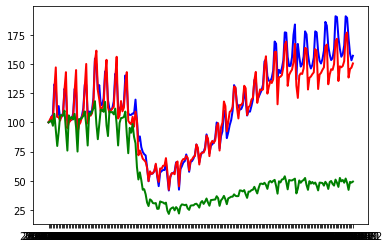

In [17]:
# Plot mobility data for California
plt.plot(driving['dates'],driving['California'],linewidth = 2, color="Blue", label = "Driving")
plt.plot(walking['dates'],walking['California'],linewidth = 2, color="Red", label = "Walking")
plt.plot(transit['dates'],transit['California'],linewidth = 2, color="Green", label = "Transit")


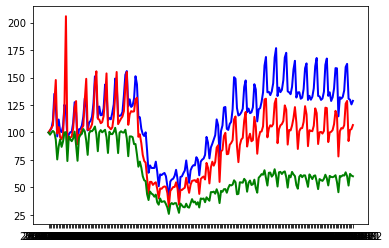

In [18]:
# Plot mobility data for Florida
plt.plot(driving['dates'],driving['Florida'],linewidth = 2, color="Blue", label = "Driving")
plt.plot(walking['dates'],walking['Florida'],linewidth = 2, color="Red", label = "Walking")
plt.plot(transit['dates'],transit['Florida'],linewidth = 2, color="Green", label = "Transit")

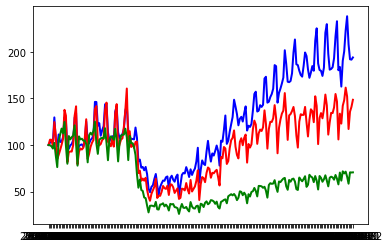

In [19]:
# Plot mobility data for New York
plt.plot(driving['dates'],driving['New York'],linewidth = 2, color="Blue", label = "Driving")
plt.plot(walking['dates'],walking['New York'],linewidth = 2, color="Red", label = "Walking")
plt.plot(transit['dates'],transit['New York'],linewidth = 2, color="Green", label = "Transit")

In [20]:
# Filtering US Mobility data by specified date range
start_date = "2020-02-15"
end_date = "2020-03-15"
mask = (usa_mobility_df["dates"] > start_date) & (usa_mobility_df["dates"] <= end_date)
feb_march_df = usa_mobility_df.loc[mask]
feb_march_df.head()

sub-region,transportation_type,dates,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
34,driving,2020-02-16,109.628571,103.886667,136.887500,101.376596,128.067973,133.299744,106.755455,101.306667,...,105.794247,113.800262,143.773333,175.938333,121.280,115.988854,144.659355,109.398846,129.946415,127.836667
35,driving,2020-02-17,123.572500,109.130000,139.536250,107.479787,131.830676,133.370000,117.970909,115.536667,...,116.759452,121.474346,205.249444,168.472500,113.195,119.825938,157.376774,115.435385,109.900377,128.386667
36,driving,2020-02-18,109.319643,104.241667,116.221250,100.926383,114.652568,103.011538,109.424545,105.026667,...,105.284521,110.401414,128.626111,130.260000,118.080,106.451042,134.826452,114.651923,106.998113,108.901667
37,driving,2020-02-19,113.315714,106.498333,120.231250,104.630000,115.025946,107.006923,112.010000,104.846667,...,108.881096,105.976911,125.167222,132.879167,110.365,108.061771,133.579032,109.834615,105.817170,109.886667
38,driving,2020-02-20,120.620179,107.800000,129.789375,112.252979,120.621216,118.221282,116.472727,108.306667,...,109.020137,115.884293,141.359444,139.692500,114.330,110.175104,139.950968,120.153462,117.861698,120.615000


In [21]:
# Split the data for driving/walking/transit for USA
driving_febm = feb_march_df.loc[feb_march_df["transportation_type"]=='driving']
driving_febm.head()

sub-region,transportation_type,dates,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
34,driving,2020-02-16,109.628571,103.886667,136.887500,101.376596,128.067973,133.299744,106.755455,101.306667,...,105.794247,113.800262,143.773333,175.938333,121.280,115.988854,144.659355,109.398846,129.946415,127.836667
35,driving,2020-02-17,123.572500,109.130000,139.536250,107.479787,131.830676,133.370000,117.970909,115.536667,...,116.759452,121.474346,205.249444,168.472500,113.195,119.825938,157.376774,115.435385,109.900377,128.386667
36,driving,2020-02-18,109.319643,104.241667,116.221250,100.926383,114.652568,103.011538,109.424545,105.026667,...,105.284521,110.401414,128.626111,130.260000,118.080,106.451042,134.826452,114.651923,106.998113,108.901667
37,driving,2020-02-19,113.315714,106.498333,120.231250,104.630000,115.025946,107.006923,112.010000,104.846667,...,108.881096,105.976911,125.167222,132.879167,110.365,108.061771,133.579032,109.834615,105.817170,109.886667
38,driving,2020-02-20,120.620179,107.800000,129.789375,112.252979,120.621216,118.221282,116.472727,108.306667,...,109.020137,115.884293,141.359444,139.692500,114.330,110.175104,139.950968,120.153462,117.861698,120.615000


In [22]:
# Split the data for driving/walking/transit for USA
walking_febm = feb_march_df.loc[feb_march_df["transportation_type"]=='walking']
walking_febm.head()

sub-region,transportation_type,dates,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
456,walking,2020-02-16,94.90,86.40,104.935,NaN,127.493810,115.760,97.386667,NaN,...,120.425,128.015000,81.55,NaN,NaN,94.043333,141.926667,NaN,136.045,NaN
457,walking,2020-02-17,98.42,95.09,108.505,NaN,119.583333,102.110,109.780000,NaN,...,105.450,115.185000,115.81,NaN,NaN,95.250000,145.880000,NaN,124.940,NaN
458,walking,2020-02-18,93.74,100.62,113.285,NaN,109.419524,88.215,102.046667,NaN,...,90.200,107.561667,111.92,NaN,NaN,92.090000,134.170000,NaN,144.605,NaN
459,walking,2020-02-19,105.19,104.43,114.680,NaN,112.455238,97.160,111.583333,NaN,...,103.485,104.201667,122.01,NaN,NaN,88.593333,132.443333,NaN,127.350,NaN
460,walking,2020-02-20,95.59,107.14,126.010,NaN,114.736667,127.475,108.146667,NaN,...,97.345,109.405000,130.59,NaN,NaN,81.353333,148.963333,NaN,133.320,NaN


In [23]:
# Split the data for driving/walking/transit for USA
transit_febm = feb_march_df.loc[feb_march_df["transportation_type"]=='transit']
transit_febm.head()

sub-region,transportation_type,dates,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
245,transit,2020-02-16,81.65,NaN,80.845,NaN,85.542941,81.895,89.453333,NaN,...,84.275,92.970000,59.13,NaN,NaN,79.753333,76.566667,NaN,101.560,NaN
246,transit,2020-02-17,116.36,NaN,102.540,NaN,98.512353,100.685,114.160000,NaN,...,102.495,109.996667,94.80,NaN,NaN,94.876667,106.043333,NaN,162.315,NaN
247,transit,2020-02-18,111.81,NaN,109.980,NaN,110.847059,89.590,117.416667,NaN,...,100.990,114.283333,95.61,NaN,NaN,98.830000,105.826667,NaN,161.240,NaN
248,transit,2020-02-19,125.18,NaN,103.710,NaN,110.649412,97.635,118.596667,NaN,...,98.035,110.325000,98.82,NaN,NaN,101.186667,103.163333,NaN,156.850,NaN
249,transit,2020-02-20,110.24,NaN,105.290,NaN,108.973529,118.040,122.063333,NaN,...,96.590,108.303333,99.43,NaN,NaN,82.150000,105.320000,NaN,158.175,NaN
